# Palmer Penguin Project

***

This notebook contains my analysis of famous palmer penguins datset.

![image palmer penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

Data is available on [GITHUB](https://allisonhorst.github.io/palmerpenguins/)


### Let's import python modules

In [1]:
# Data frames
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
#numerical arrays
import numpy as np

### Let's load the palmer penguin data set

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

### Summary of the numbers


In [3]:
#Describe main statistics of data
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
# playing around not ready yet 
bill_length = df["bill_length_mm"].to_numpy()
bill_depth = df["bill_depth_mm"].to_numpy()
flipper_length = df["flipper_length_mm"].to_numpy()
body_mass = df["body_mass_g"].to_numpy()


### Composition of the colony

Text(0.5, 1.0, 'Number of penguins per specie')

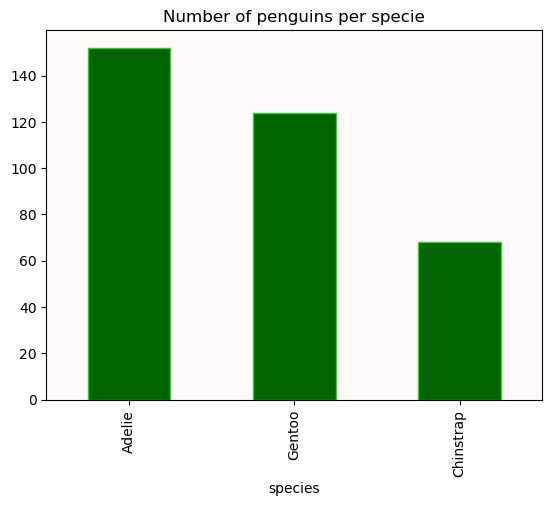

In [6]:

number_of_penguins =df ["species"].value_counts().plot.bar(color="darkgreen",edgecolor="limegreen")
number_of_penguins.set_facecolor("snow")
plt.title("Number of penguins per specie")

### current volume and distribution of Palmer penguins by Species

Text(0, 0.5, 'Pelmer Penguins')

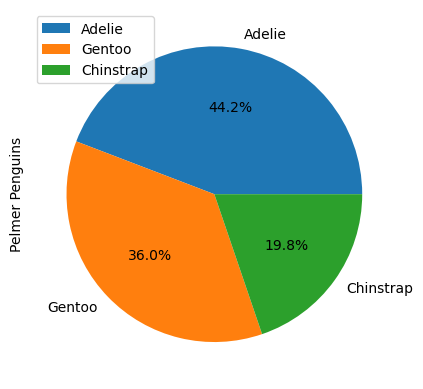

In [7]:

df ["species"].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.ylabel("Pelmer Penguins")

### Comparisong of body weigths shows that gentoo penguins 

Text(0.5, 1.0, 'Average penguin body mass by species')

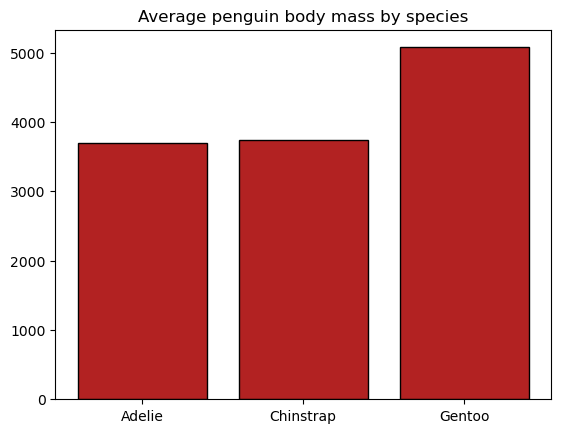

In [8]:
penguins_grouped = df[['species', 'body_mass_g']].groupby('species').mean().reset_index()

plt.bar(penguins_grouped['species'], penguins_grouped['body_mass_g'], color="firebrick",edgecolor="black")
plt.title('Average penguin body mass by species')


<BarContainer object of 2 artists>

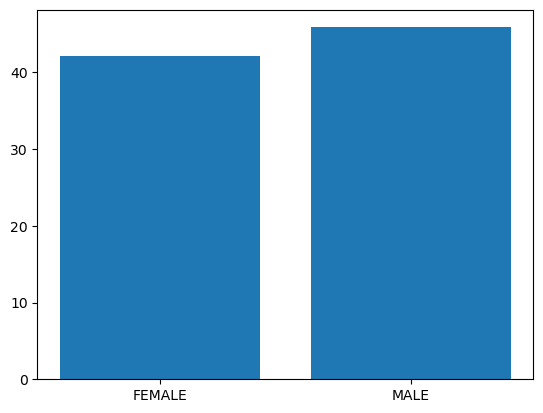

In [13]:
xd = df[['sex', 'bill_length_mm']].groupby('sex').mean().reset_index()
plt.bar(xd['sex'], xd['bill_length_mm'])

Text(0.5, 1.0, 'Palmer Penguins')

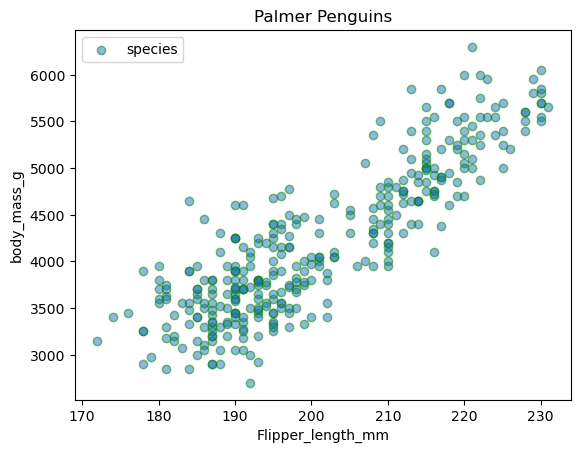

In [ ]:


plt.scatter(flipper_length, body_mass, alpha=0.5, edgecolors='g', linewidths=1)
plt.legend(["species"])

plt.xlabel("Flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Palmer Penguins")

### current volume and distribution of Palmer penguins by Species

# this will be big
under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs.under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. under a header you can have paragraphs. 

If you want a *second* paragrahps leave a blank line, 

If you want a **second** paragrahps leave a blank line, 

If you want a second paragrahps leave a blank line, 
If you want a second paragrahps leave a blank line, 
If you want a second paragrahps leave a blank line, 
If you want a second paragrahps leave a blank line, 

## slightly smaller 

- Bullet
  -  second level 
- Point
- List

### slightly smaller 

1. number bullets
2. bullets

#### slightly smaller 
> let see the ouput
##### slightly smaller 
###### slightly smaller 



***

### END

## Tables
***


|Species   | Bill Length (mm) |Body Mass  (g)  |
|----------|------------------:|--------------:|
|Adelie    |               38.8|           3701|
|Chinstrap |               48.8|           3733|
|Gentoo    |               47.5|           5067|


In [ ]:
#Sex of penguins

df["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [ ]:
#Look at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [ ]:
#count the number of penguins of each sex
df ["species"].value_counts()


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

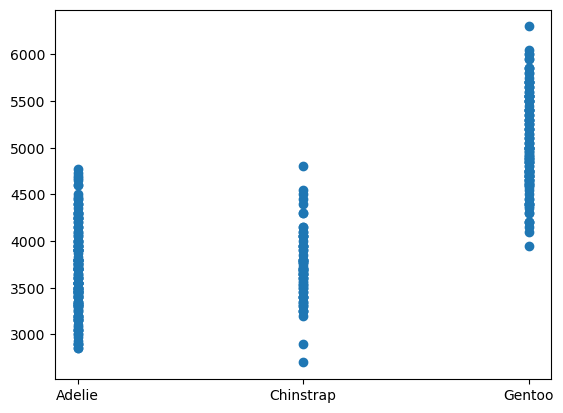

In [ ]:
plt.scatter(df ["species"], df[ "body_mass_g"])

In [ ]:
df["species"]

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object